<a href="https://colab.research.google.com/github/justin-2003/CSC467_Week2_lab/blob/main/lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from skimage import io as io_url

# CSC467 Computer Vision and Pattern Recognition
## Lab 2 - Basic Image Processing
### Justin Sam

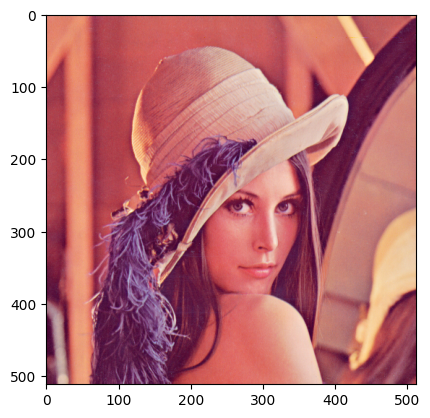

In [20]:
frame = io_url.imread('https://raw.githubusercontent.com/justin-2003/CSC467_Week2_lab/main/Lena.png')
frame = np.float32(frame) / 255

plt.imshow(frame)


In [21]:
print(frame.shape)

(512, 512, 3)


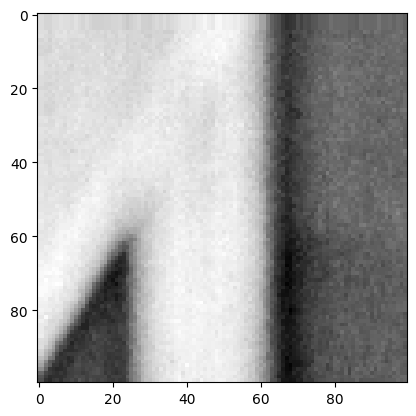

In [22]:
frm= frame[0:100,0:100,0]

plt.imshow(frm, cmap="gray")

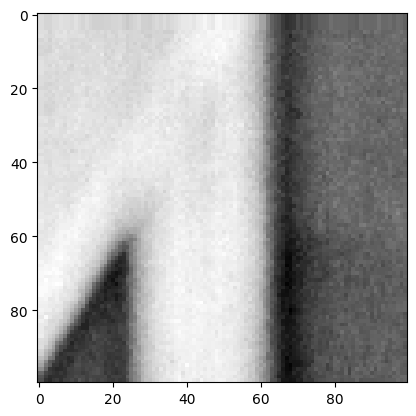

In [23]:
array = np.array(frame)

frm = frame[0:100,0:100,0]

plt.imshow(frm, cmap="gray")

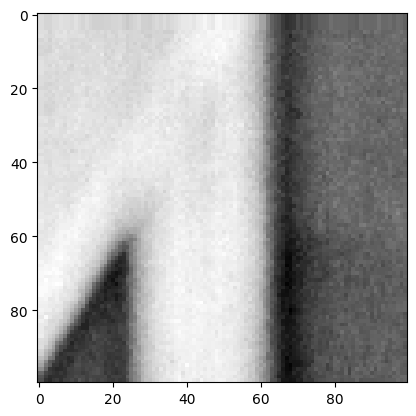

In [24]:
new_array = frm + 20
plt.imshow(new_array, cmap='gray')

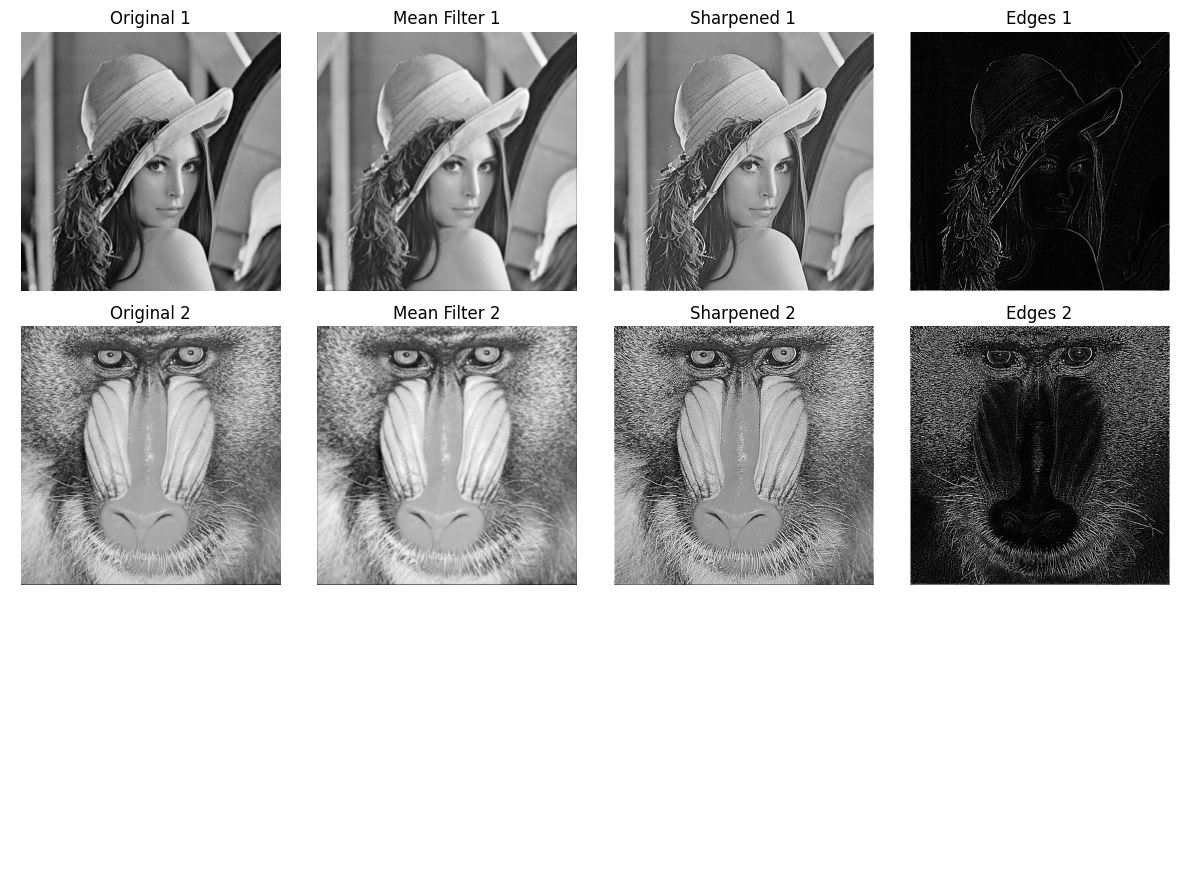

In [25]:
import numpy as np
import cv2
import requests
import matplotlib.pyplot as plt

def url_to_image(url):
    "Downloads an image from a URL and converts it to a grayscale NumPy array."
    resp = requests.get(url, stream=True)
    if resp.status_code == 200:
        image = np.asarray(bytearray(resp.content), dtype="uint8")
        image = cv2.imdecode(image, cv2.IMREAD_GRAYSCALE)
        return image
    else:
        print(f"Error: Could not download {url}")
        return None

def apply_convolution(image, kernel):
    "Applies a 3x3 convolution filter manually."
    h, w = image.shape
    kernel_size = 3
    pad = kernel_size // 2

    # Padding the image to handle borders
    padded_image = np.pad(image, pad, mode='constant', constant_values=0)
    result = np.zeros((h, w))

    for i in range(h):
        for j in range(w):
            region = padded_image[i:i+kernel_size, j:j+kernel_size]
            result[i, j] = np.sum(region * kernel)

    # Normalize the output
    result = np.clip(result, 0, 255)
    return result.astype(np.uint8)

# Define the 3x3 kernels
mean_kernel = np.ones((3, 3)) / 9
sharpen_kernel = np.array([[0, -1,  0],
                           [-1,  5, -1],
                           [0, -1,  0]])
edge_kernel = np.array([[-1, -1, -1],
                         [-1,  8, -1],
                         [-1, -1, -1]])

# Load images from URLs
image1_url = "https://raw.githubusercontent.com/justin-2003/CSC467_Week2_lab/main/Lena.png"
image2_url = "https://raw.githubusercontent.com/justin-2003/CSC467_Week2_lab/main/baboon.png"

image1 = url_to_image(image1_url)
image2 = url_to_image(image2_url)

# Apply filters
mean_filtered1 = apply_convolution(image1, mean_kernel)
sharpened1 = apply_convolution(image1, sharpen_kernel)
edges1 = apply_convolution(image1, edge_kernel)

mean_filtered2 = apply_convolution(image2, mean_kernel)
sharpened2 = apply_convolution(image2, sharpen_kernel)
edges2 = apply_convolution(image2, edge_kernel)

# Display results
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
axes[0, 0].imshow(image1, cmap='gray'); axes[0, 0].set_title("Original 1")
axes[0, 1].imshow(mean_filtered1, cmap='gray'); axes[0, 1].set_title("Mean Filter 1")
axes[0, 2].imshow(sharpened1, cmap='gray'); axes[0, 2].set_title("Sharpened 1")
axes[0, 3].imshow(edges1, cmap='gray'); axes[0, 3].set_title("Edges 1")

axes[1, 0].imshow(image2, cmap='gray'); axes[1, 0].set_title("Original 2")
axes[1, 1].imshow(mean_filtered2, cmap='gray'); axes[1, 1].set_title("Mean Filter 2")
axes[1, 2].imshow(sharpened2, cmap='gray'); axes[1, 2].set_title("Sharpened 2")
axes[1, 3].imshow(edges2, cmap='gray'); axes[1, 3].set_title("Edges 2")

for ax in axes.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
Thank you